<a href="https://colab.research.google.com/github/imabari/ehime-covid-bot/blob/main/matsuyama_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 5.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=648d8e0cd3465062e8f6bfce63e6399c82dea5c6a2492a410c789fa8aa450a41
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [2]:
import datetime
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
import japanize_matplotlib

In [5]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 200

In [6]:
def str2date(ser):
    df_date = (
        ser.str.extract("令和(\d{1,2})年度?(\d{1,2})月(\d{1,2})日")
        .rename(columns={0: "year", 1: "month", 2: "day"})
        .astype(int)
    )
    df_date["year"] = df_date["year"].replace({2: 2020, 3: 2021})

    return pd.to_datetime(df_date, errors="coerce")

In [7]:
def str2normalize(df):
    for col in df.select_dtypes(include=object).columns:
        df[col] = df[col].str.strip().str.normalize("NFKC").str.replace(" ", "")
    
    return df

In [8]:
def str2data(ser):
    df = (
        ser.str.extractall(
            "(.+?):(\d{1,3})人",
        )
        .droplevel(1)
        .rename(columns={0: ser.name, 1: "人数"})
        .pivot(columns=ser.name, values="人数")
        .fillna(0)
        .astype(int)
    )
    return df

# 2020/03/～2021/01/04

In [9]:
urls = [
    "https://www.city.matsuyama.ehime.jp/kurashi/iryo/hokenyobo/kansensho/tyuui/mcovid_R0210made.html",
    "https://www.city.matsuyama.ehime.jp/kurashi/iryo/hokenyobo/kansensho/tyuui/mcovid_R0211.html",
    "https://www.city.matsuyama.ehime.jp/kurashi/iryo/hokenyobo/kansensho/tyuui/mcovid_R0212-01.html",
]

In [10]:
dfs = [pd.read_html(url)[0].sort_index(ascending=False) for url in urls]

In [11]:
df1 = str2normalize(pd.concat(dfs).reset_index(drop=True))

In [12]:
df1["date"] = str2date(df1["発表日"])

In [13]:
df1 = df1[~df1["市内事例（県内）"].str.contains("陰性")]

In [14]:
df1

,番号,発表日,年代,性別,職業等,市内事例（県内）,date
0,1,令和2年3月4日(PDF:136KB),30代,女性,会社員,1事例目(県内2事例目)(外部サイト),2020-03-04
1,2,令和2年3月18日(PDF:161KB),30代,女性,会社員,2事例目(県内3事例目),2020-03-18
3,4,令和2年3月31日(PDF:159KB),70代,男性,自営業,4事例目(県内6事例目),2020-03-31
4,4,令和2年3月31日(PDF:159KB),80代,女性,無職,3事例目(県内5事例目),2020-03-31
5,4,令和2年3月31日(PDF:159KB),80代,男性,無職,3事例目(県内5事例目),2020-03-31
...,...,...,...,...,...,...,...
422,117,令和3年1月4日(PDF:137KB),50代,男性,会社員,118事例目(県内155事例目),2021-01-04
423,117,令和3年1月4日(PDF:137KB),非公表,男性,非公表,119事例目(県内156事例目),2021-01-04
424,117,令和3年1月4日(PDF:137KB),70代,女性,非公表,119事例目(県内156事例目),2021-01-04
425,117,令和3年1月4日(PDF:137KB),20代,男性,会社員,120事例目(県内157事例目),2021-01-04


# 2021/01/05～

In [15]:
df2 = str2normalize(
    pd.read_html(
        "https://www.city.matsuyama.ehime.jp/kurashi/iryo/hokenyobo/kansensho/tyuui/sinngatakorona.html"
    )[2]
    .sort_index(ascending=False)
    .dropna(thresh=3)
    .drop_duplicates()
    .reset_index(drop=True)
)

In [16]:
df2["date"] = str2date(df2["発表日"])

In [17]:
df2

,番号,発表日,年代,性別,職業等,事例,date
0,118,令和3年1月5日(PDF:148KB),20代:2人30代:3人40代:2人50代:5人非公表:7人,男性:10人女性:2人非公表:7人,無職:4人会社員:3人会社役員:2人自営業:1人アルバイト:1人非公表:8人,既存:10人新規:9人,2021-01-05
1,119,令和3年1月6日(PDF:152KB),10代:3人20代:4人30代:2人40代:3人60代:5人70代:3人,男性:12人女性:8人,自営業:7人会社員:5人無職:4人学校関係者:3人医療関係者:1人,既存:13人新規:7人,2021-01-06
2,120,令和3年1月7日(PDF:151KB),10代:2人20代:5人30代:3人40代:2人50代:2人60代:3人70代:1人80代:1人,男性:9人女性:10人,会社員:7人無職:4人自営業:3人学校関係者:3人福祉関係者:1人公務員:1人,既存:11人新規:8人,2021-01-07
3,121,令和3年1月8日(PDF:155KB),20代:7人30代:6人40代:3人60代:3人70代:1人80代:2人,男:12人女:10人,会社員:10人無職:7人アルバイト:1人自営業:1人公務員:1人団体職員:1人学校関係者:1人,既存:14人新規:8人,2021-01-08
4,122,令和3年1月9日(PDF:177KB),20代:1人30代:7人40代:4人50代:3人60代:1人80代:1人,男:9人女:8人,無職:6人会社員:4人自営業:4人公務員:2人医療関係者:1人,既存:13人新規:4人,2021-01-09
5,123,令和3年1月10日(PDF:173KB),20代:7人30代:2人40代:2人60代:1人70代:3人,男性:10人女性:5人,会社員:10人自営業:2人無職:2人会社役員:1人,既存:9人新規:6人,2021-01-10
6,124,令和3年1月11日(PDF:154KB),20代:8人30代:4人40代:4人50代:1人非公表:2人,男性:15人女性:4人,会社員:12人学校関係者:4人会社役員:2人無職:1人,既存:8人新規:11人,2021-01-11
7,125,令和3年1月12日(PDF:153KB),10代:3人20代:5人30代:1人40代:2人70代:2人,男性:2人女性:11人,学校関係者:6人無職:3人会社員:2人自営業:2人,既存:12人新規:1人,2021-01-12
8,126,令和3年1月13日(PDF:153KB),20代:3人30代:1人40代:2人90代:1人,男性:5人女性:2人,学校関係者:2人自営業:2人無職:2人会社員:1人,既存:1人新規:6人,2021-01-13
9,127,令和3年1月14日(PDF:152KB),10歳未満:1人20代:6人30代:3人40代:2人50代:1人60代:5人70代:1人,男性:12人女性:7人,会社員:8人無職:5人学校関係者:2人自営業:2人医療関係者:1人福祉関係者:1人,既存:11人新規:8人,2021-01-14


# 日付

In [18]:
df_case = str2data(df2["事例"]).join(df2["date"]).set_index("date")
df_case

,新規,既存
date,,
2021-01-05,9,10
2021-01-06,7,13
2021-01-07,8,11
2021-01-08,8,14
2021-01-09,4,13
2021-01-10,6,9
2021-01-11,11,8
2021-01-12,1,12
2021-01-13,6,1


In [19]:
s1_date = df1["date"].value_counts().sort_index()

In [20]:
s2_date = df_case.sum(axis=1)

In [21]:
s_date = pd.concat([s1_date, s2_date]).sort_index()

In [22]:
s_date

2020-03-04    1
2020-03-18    1
2020-03-31    5
2020-04-03    4
2020-04-08    1
             ..
2021-01-24    3
2021-01-25    5
2021-01-26    7
2021-01-27    9
2021-01-28    1
Length: 113, dtype: int64

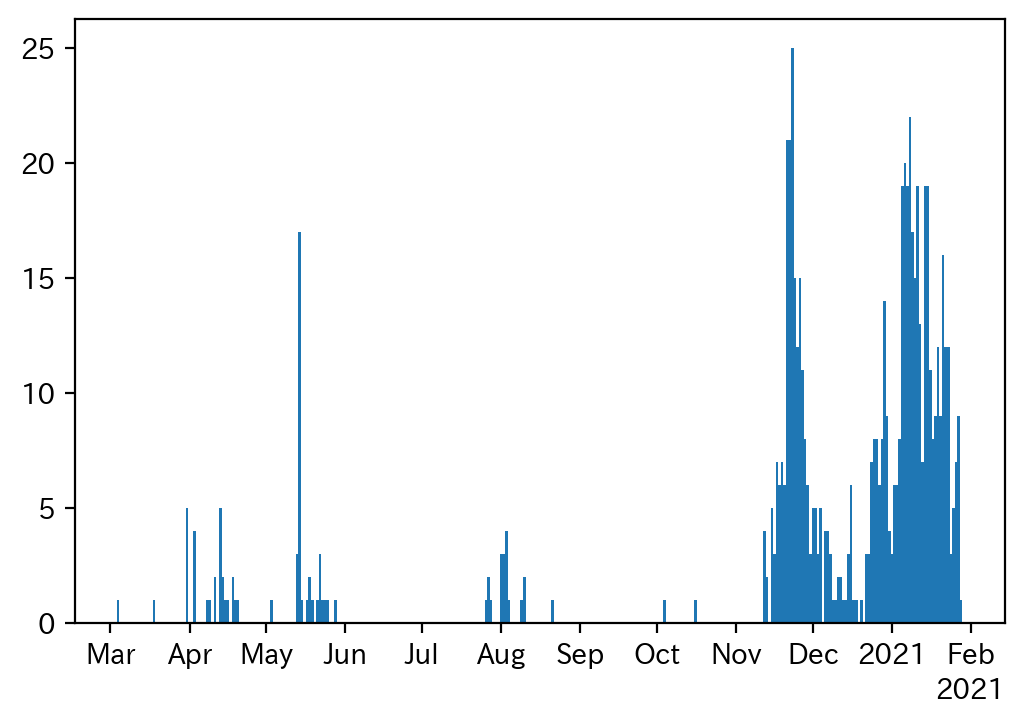

In [23]:
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(s_date.index, s_date.values, width=1)

plt.savefig("01.png", dpi=200, bbox_inches="tight")
plt.show()

In [24]:
s_date.resample("M").sum()

2020-03-31      7
2020-04-30     21
2020-05-31     34
2020-06-30      0
2020-07-31      4
2020-08-31     15
2020-09-30      0
2020-10-31      2
2020-11-30    177
2020-12-31    119
2021-01-31    326
Freq: M, dtype: int64

In [25]:
s_date.sum()

705

# 年代

In [26]:
df1_ages = pd.crosstab(df1["date"], df1["年代"])
df2_ages = str2data(df2["年代"]).join(df2["date"]).set_index("date")

df_ages = pd.concat([df1_ages, df2_ages]).fillna(0).astype(int).sort_index()

In [27]:
df_ages

,10代,20代,30代,40代,50代,60代,70代,80代,90代,調査中,非公表,10歳未満
date,,,,,,,,,,,,
2020-03-04,0,0,1,0,0,0,0,0,0,0,0,0
2020-03-18,0,0,1,0,0,0,0,0,0,0,0,0
2020-03-31,0,0,0,0,1,1,1,2,0,0,0,0
2020-04-03,0,0,0,2,1,0,0,1,0,0,0,0
2020-04-08,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,1,0,4,0,4,0,1,1,0,0,0,1
2021-01-24,0,1,0,0,0,0,2,0,0,0,0,0
2021-01-25,0,0,2,1,0,0,0,0,0,0,0,2


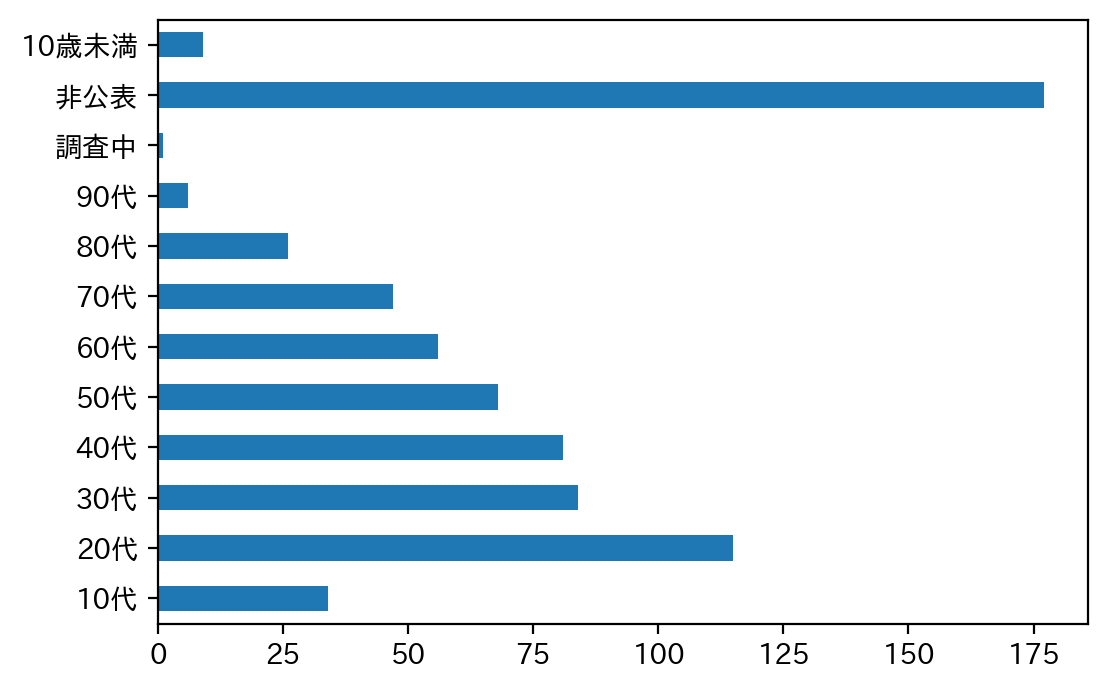

In [28]:
df_ages.sum().plot.barh()

plt.savefig("02.png", dpi=200, bbox_inches="tight")
plt.show()

# 性別

In [29]:
df1_sexs = pd.crosstab(df1["date"], df1["性別"])

df2_sexs = str2data(df2["性別"]).join(df2["date"]).set_index("date")
df2_sexs["男性"] += df2_sexs["男"]
df2_sexs["女性"] += df2_sexs["女"]
df2_sexs.drop(["男", "女"], axis=1, inplace=True)

df_sexs = pd.concat([df1_sexs, df2_sexs]).fillna(0).astype(int).sort_index()

In [30]:
df_sexs

,女性,男性,調査中,非公表
date,,,,
2020-03-04,1,0,0,0
2020-03-18,1,0,0,0
2020-03-31,1,4,0,0
2020-04-03,2,2,0,0
2020-04-08,0,1,0,0
...,...,...,...,...
2021-01-23,6,6,0,0
2021-01-24,2,1,0,0
2021-01-25,1,4,0,0


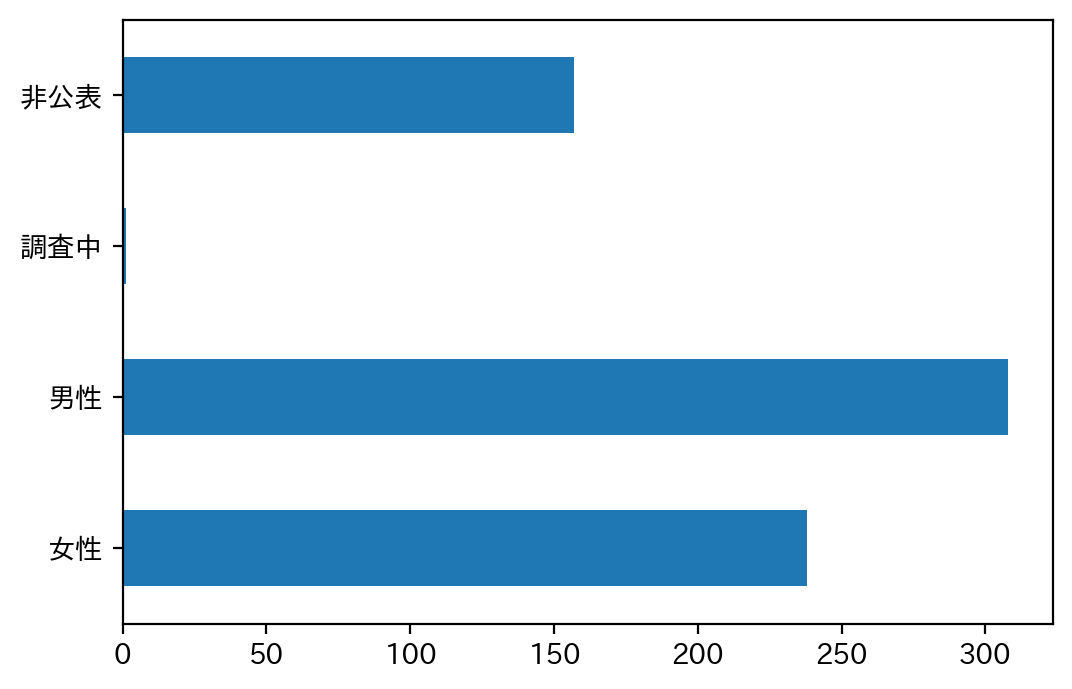

In [31]:
df_sexs.sum().plot.barh()

plt.savefig("03.png", dpi=200, bbox_inches="tight")
plt.show()

# 職業等

In [32]:
df1["職業等"] = df1["職業等"].replace(
    {
        "入院患者等": "入院患者",
        "学校関係者※学校での活動なし": "学校関係者",
        "看護職員※居住地は松前町": "看護職員",
        "医療機関Aに勤務する職員": "医療機関職員",
        "医療機関職員※居住地は東温市": "医療機関職員",
        "医療機関Aに勤務する介護職員": "介護職員", 
    }
)

In [33]:
df1_works = pd.crosstab(df1["date"], df1["職業等"])
df2_works = str2data(df2["職業等"]).join(df2["date"]).set_index("date")

df_works = pd.concat([df1_works, df2_works]).fillna(0).astype(int).sort_index()

In [34]:
df_works.sum()

プロサッカー選手      1
介護職員          4
会社員         179
会社役員         18
入院患者         19
公務員           7
利用者           8
医療従事者         2
医療機関職員        3
医療関係者        11
団体職員          8
学校関係者        66
学生            7
教職員           5
教諭            1
無職          112
看護職員          6
職員            5
自営業          50
調査中           2
非公表         164
高齢者施設入居者      1
アルバイト        10
スポーツ関係者       1
福祉関係者        14
dtype: int64

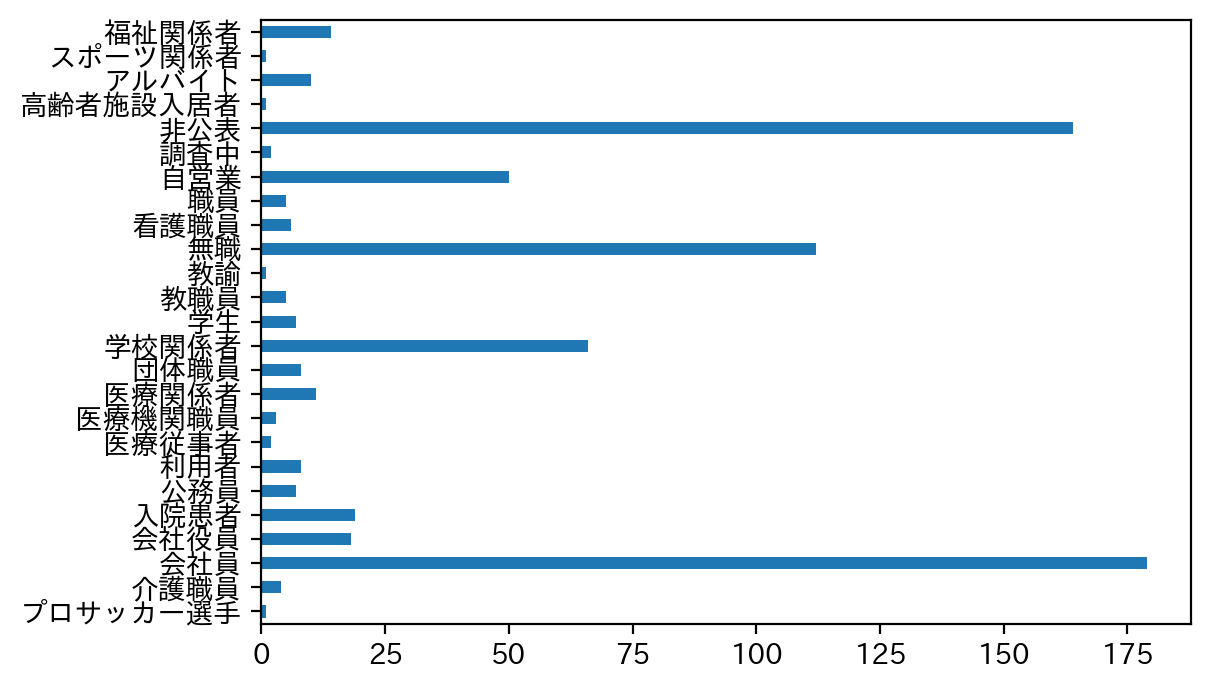

In [35]:
df_works.sum().plot.barh()

plt.savefig("04.png", dpi=200, bbox_inches="tight")
plt.show()

In [36]:
df_works

,プロサッカー選手,介護職員,会社員,会社役員,入院患者,公務員,利用者,医療従事者,医療機関職員,医療関係者,団体職員,学校関係者,学生,教職員,教諭,無職,看護職員,職員,自営業,調査中,非公表,高齢者施設入居者,アルバイト,スポーツ関係者,福祉関係者
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0
2020-04-03,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2020-04-08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,0,0,2,0,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,2
2021-01-24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2021-01-25,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
